# Начало ЛР

Выгрузка данных из CSV в датафрейм

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv(".//static//csv//students_adaptability_level_online_education.csv")
dataframe.head()

Education Level Institution Type  Gender  Age  Device IT Student Location  \
0      University          Private    Male   23     Tab         No     Town   
1      University          Private  Female   23  Mobile         No     Town   
2         College           Public  Female   18  Mobile         No     Town   
3          School          Private  Female   11  Mobile         No     Town   
4          School          Private  Female   18  Mobile         No     Town   

  Financial Condition Internet Type Network Type Flexibility Level  
0                 Mid          Wifi           4G          Moderate  
1                 Mid   Mobile Data           4G          Moderate  
2                 Mid          Wifi           4G          Moderate  
3                 Mid   Mobile Data           4G          Moderate  
4                Poor   Mobile Data           3G               Low

# Диаграмма 1 (Круговая)

Данная диаграмма (круговая) отображает распределение людей по типу соединения к интернету (4G, 3G, 2G). Это позволяет сделать вывод о том, что люди с низким уровнем заработка имеют чаще всего 3G и 4G (одинаково), чем 2G.

Text(0.5, 1.0, 'Распределение людей низкого уровня заработка по типу соединения')

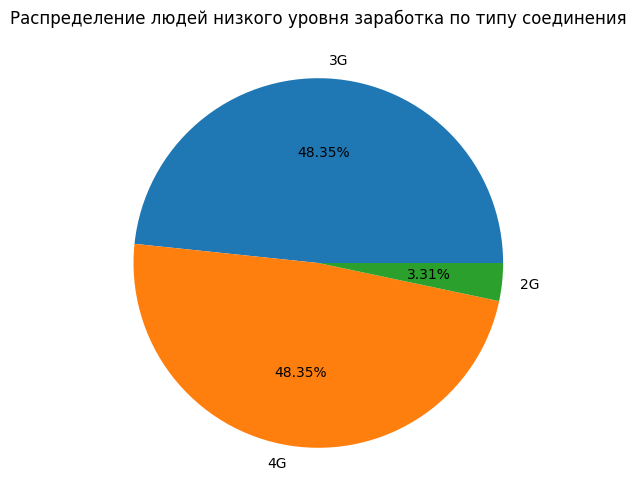

In [36]:
rural_df = dataframe[dataframe['Financial Condition'] == "Poor"]

network_type_rural_count = rural_df['Network Type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(network_type_rural_count, labels=network_type_rural_count.index, autopct='%1.2f%%')
plt.title("Распределение людей низкого уровня заработка по типу соединения")

# Диаграмма 2 (Линейная)

Данная диаграмма выполнена на срезе данных и отображает количество студентов в разных возрастных группах. Из нее можно сделать вывод, что в подростковом возрасте (10-15) люди менее интересуются IT направлением, но в возрасте 20-25 лет количество учеников IT направлений начинает преобладать над не IT сферой (и в это же время количество не IT студентов начинает убывать).

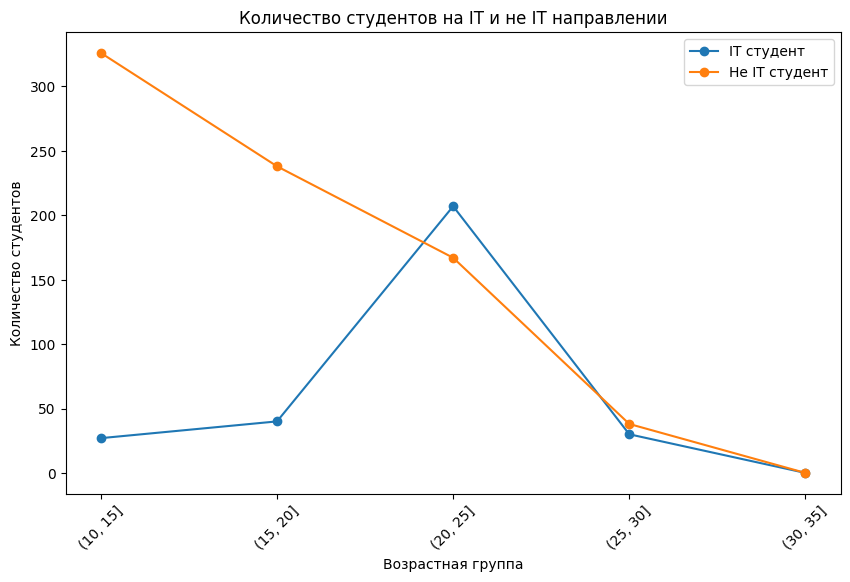

In [45]:
df_cut = dataframe.iloc[0:1500]

it_student_df = df_cut[df_cut['IT Student'] == "Yes"].copy()
nonit_student_df = df_cut[df_cut['IT Student'] == "No"].copy()

age_bins = range(10, 36, 5)


it_student_df['age_group'] = pd.cut(it_student_df['Age'], bins=age_bins)
it_student_count = it_student_df.groupby('age_group', observed=False)['IT Student'].value_counts().reset_index()
mean_count_it = it_student_count.groupby('age_group', observed=False)['count'].mean()

nonit_student_df['age_group'] = pd.cut(nonit_student_df['Age'], bins=age_bins)
nonit_student_count = nonit_student_df.groupby('age_group', observed=False)['IT Student'].value_counts().reset_index()
mean_count_nonit = nonit_student_count.groupby('age_group', observed=False)['count'].mean()

plt.figure(figsize=(10,6))
plt.plot(mean_count_it.index.astype(str), mean_count_it , marker='o', label='IT студент')
plt.plot(mean_count_nonit.index.astype(str), mean_count_nonit , marker='o', label='Не IT студент')
plt.xlabel("Возрастная группа")
plt.ylabel("Количество студентов")
plt.title('Количество студентов на IT и не IT направлении')
plt.xticks(rotation=45)
plt.legend()

# Диаграмма 3 (Гистограмма)

Данная диаграмма отображает количество людей по типу соединения к сети Интернет. На основе этой диаграммы можно сделать вывод, что чаще всего используют мобильный интернет, чем Wi-Fi

Text(0, 0.5, 'Количество')

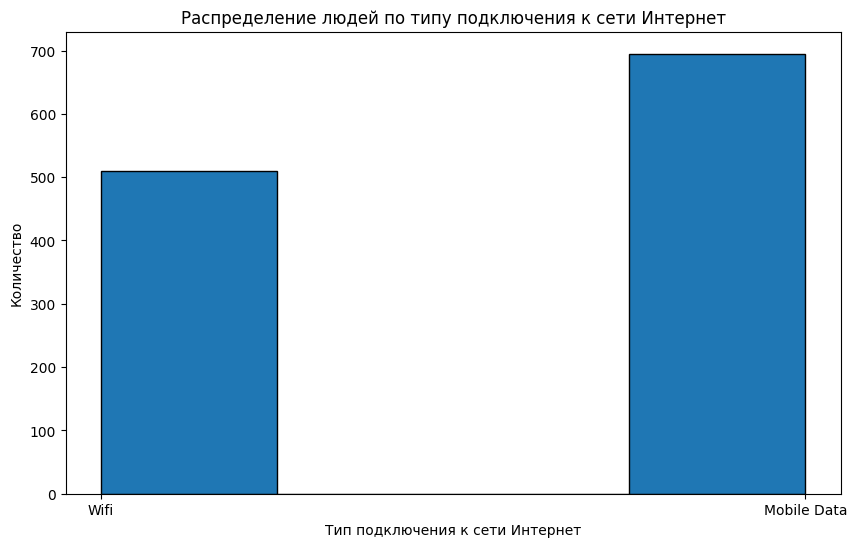

In [46]:
plt.figure(figsize=(10,6))
plt.hist(dataframe.head(20000)['Internet Type'], bins=4, edgecolor='black')
plt.title("Распределение людей по типу подключения к сети Интернет")
plt.xlabel("Тип подключения к сети Интернет")
plt.ylabel("Количество")